### Load Packages

In [1]:
suppressMessages(require(Seurat))
suppressMessages(require(Matrix))

Loading required package: DoubletFinder



## Read in Data

In [2]:
aud_07 <- Seurat:: Read10X('../../human_alcohol_brenner_et_al/alcohol_07/')
aud_14 <- Seurat:: Read10X('../../human_alcohol_brenner_et_al/alcohol_14/')
aud_23 <- Seurat:: Read10X('../../human_alcohol_brenner_et_al/alcohol_23/')
ctrl_01 <- Seurat:: Read10X('../../human_alcohol_brenner_et_al/control_01/')
ctrl_071 <- Seurat:: Read10X('../../human_alcohol_brenner_et_al/control_07-1/')
ctrl_072 <- Seurat:: Read10X('../../human_alcohol_brenner_et_al/control_07-2/')
ctrl_09 <- Seurat:: Read10X('../../human_alcohol_brenner_et_al/control_09/')
ctrl_17 <- Seurat:: Read10X('../../human_alcohol_brenner_et_al/control_17/')

## Convert to Seurat objects and add metadata

In [3]:
sdata.aud_07 <- CreateSeuratObject(aud_07, project="aud_07")
sdata.aud_14 <- CreateSeuratObject(aud_14, project = "aud_14")
sdata.aud_23 <- CreateSeuratObject(aud_23, project="aud_23")
sdata.ctrl_01 <- CreateSeuratObject(ctrl_01, project="ctrl_01")
sdata.ctrl_071 <- CreateSeuratObject(ctrl_071, project="ctrl_071")
sdata.ctrl_072 <- CreateSeuratObject(ctrl_072, project="ctrl_072")
sdata.ctrl_09 <- CreateSeuratObject(ctrl_09, project="ctrl_09")
sdata.ctrl_17 <- CreateSeuratObject(ctrl_17, project="ctrl_17")

# add metadata
sdata.aud_07$type = "AUD"
sdata.aud_14$type = "AUD"
sdata.aud_23$type = "AUD"
sdata.ctrl_01$type = "Ctrl"
sdata.ctrl_071$type = "Ctrl"
sdata.ctrl_072$type = "Ctrl"
sdata.ctrl_09$type = "Ctrl"
sdata.ctrl_17$type = "Ctrl"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


## Merge all seurat objects into one

In [4]:
# Merge datasets into one single seurat object
alldata <- merge(sdata.aud_07, c(sdata.aud_14, sdata.aud_23, sdata.ctrl_01, sdata.ctrl_071,
    sdata.ctrl_072, sdata.ctrl_09, sdata.ctrl_17), add.cell.ids = c("aud_07", "aud_14", "aud_23", "ctrl_01",
    "ctrl_071", "ctrl_072", "ctrl_09", "ctrl_17"))

In [5]:
# remove all objects that will not be used.
rm(aud_07, aud_14, aud_23, ctrl_01, ctrl_071, ctrl_072, ctrl_09, ctrl_17, sdata.aud_07, sdata.aud_14, sdata.aud_23,
    sdata.ctrl_01, sdata.ctrl_071, sdata.ctrl_072, sdata.ctrl_09, sdata.ctrl_17)

# run garbage collect to free up memory
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,57653356,3079.1,98529431,5262.1,64750191,3458.1
Vcells,962404781,7342.6,2710450210,20679.1,2708887786,20667.2


In [6]:
as.data.frame(alldata@assays$RNA@counts[1:10, 1:2])
head(alldata@meta.data, 10)

,aud_07_AAACCCAAGAAACACT-1,aud_07_AAACCCAAGAAACCAT-1
,<dbl>,<dbl>
DDX11L1,0,0
WASH7P,0,0
MIR6859-1,0,0
MIR1302-2HG,0,0
MIR1302-2,0,0
FAM138A,0,0
OR4G4P,0,0
OR4G11P,0,0
OR4F5,0,0


,orig.ident,nCount_RNA,nFeature_RNA,type
,<chr>,<dbl>,<int>,<chr>
aud_07_AAACCCAAGAAACACT-1,aud_07,0,0,AUD
aud_07_AAACCCAAGAAACCAT-1,aud_07,0,0,AUD
aud_07_AAACCCAAGAAACCCA-1,aud_07,1,1,AUD
aud_07_AAACCCAAGAAACCCG-1,aud_07,0,0,AUD
aud_07_AAACCCAAGAAACCTG-1,aud_07,1,1,AUD
aud_07_AAACCCAAGAAACGAA-1,aud_07,0,0,AUD
aud_07_AAACCCAAGAAACGTC-1,aud_07,0,0,AUD
aud_07_AAACCCAAGAAACTAC-1,aud_07,0,0,AUD
aud_07_AAACCCAAGAAACTCA-1,aud_07,0,0,AUD


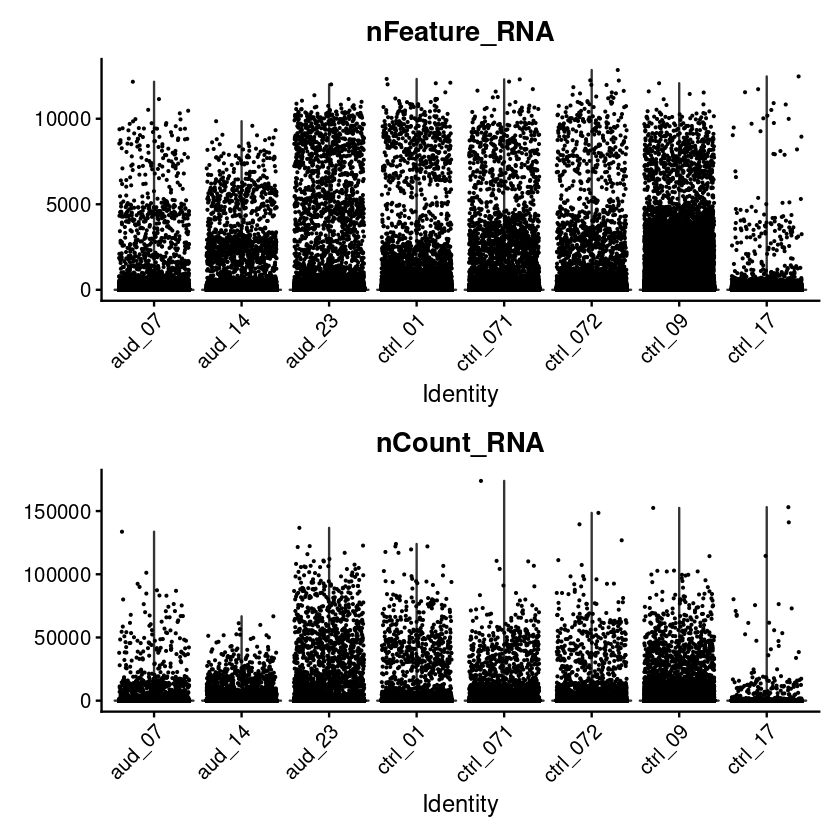

In [7]:
feats <- c("nFeature_RNA", "nCount_RNA")
VlnPlot(alldata, group.by = "orig.ident", features = feats, pt.size = 0.1, ncol = 1) + NoLegend()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



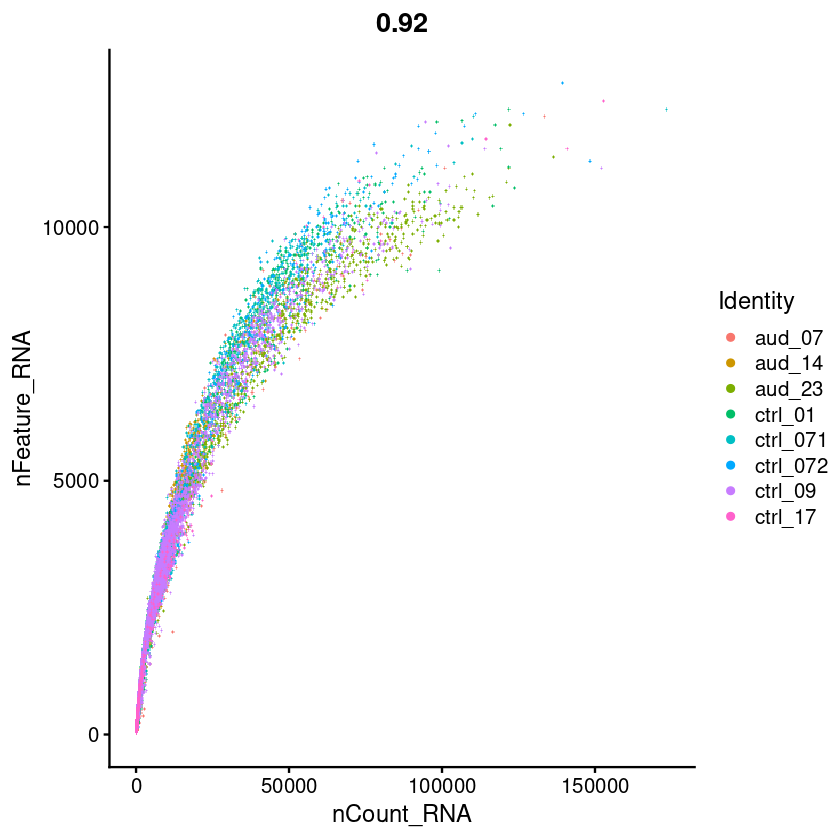

In [8]:
FeatureScatter(alldata, "nCount_RNA", "nFeature_RNA", group.by = "orig.ident", pt.size = 0.5)

## Filtering
A standard approach is to filter cells with low amount of reads as well as genes that are present in at least a certain amount of cells. Here we will only consider cells with at least 150 detected genes and genes need to be expressed in at least 10 cells.

In [9]:
selected_c <- WhichCells(alldata, expression = nFeature_RNA > 150)
selected_f <- rownames(alldata)[Matrix::rowSums(alldata) > 10]

data.filt <- subset(alldata, features = selected_f, cells = selected_c)
dim(data.filt)

[1] 32677 64760

In [10]:
data.filt

An object of class Seurat 
32677 features across 64760 samples within 1 assay 
Active assay: RNA (32677 features, 0 variable features)

In [11]:
head(data.filt)

,orig.ident,nCount_RNA,nFeature_RNA,type
,<chr>,<dbl>,<int>,<chr>
aud_07_AAACCCAAGCAACTCT-1,aud_07,279,225,AUD
aud_07_AAACCCACAATCTGCA-1,aud_07,210,174,AUD
aud_07_AAACCCAGTGAATGTA-1,aud_07,231,200,AUD
aud_07_AAACCCATCATCTGTT-1,aud_07,5477,2140,AUD
aud_07_AAACGAAAGACCATTC-1,aud_07,202,177,AUD
aud_07_AAACGAAAGCTGCCAC-1,aud_07,270,180,AUD
aud_07_AAACGAACAAACGAGC-1,aud_07,179,162,AUD
aud_07_AAACGAACATGTGTCA-1,aud_07,14472,4281,AUD
aud_07_AAACGAAGTAGCGCTC-1,aud_07,229,197,AUD


In [12]:
saveRDS(data.filt, "../../results/human_alcohol_brenner_et_al/filtered.rds")

## Normalize and Scale the filtered data

In [13]:
data.filt <- NormalizeData(data.filt)
all.genes <- rownames(data.filt)
data.filt <- ScaleData(data.filt, features = all.genes)

Centering and scaling data matrix



In [14]:
Idents(data.filt = data.filt) <- data.filt@meta.data$'type'

In [15]:
de_genes <- FindMarkers(data.filt, ident.1 = "AUD", ident.2 = "Ctrl")

In [16]:
de_genes <- as.data.frame(de_genes)

In [17]:
de_genes

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BCYRN1,0.000000e+00,1.3724266,0.406,0.198,0.000000e+00
KCNIP4,0.000000e+00,0.8104136,0.611,0.392,0.000000e+00
CSMD1,0.000000e+00,0.6566429,0.518,0.348,0.000000e+00
MALAT1,0.000000e+00,0.6280789,0.963,0.910,0.000000e+00
CALM1,0.000000e+00,-0.7971540,0.424,0.566,0.000000e+00
HSP90AA1,0.000000e+00,-1.1516082,0.290,0.443,0.000000e+00
RBFOX1,0.000000e+00,0.6431174,0.585,0.410,0.000000e+00
MT-RNR1,0.000000e+00,-0.5874714,0.531,0.721,0.000000e+00
MT-RNR2,0.000000e+00,-0.7369892,0.709,0.844,0.000000e+00


In [18]:
write.table(de_genes, "../../results/human_alcohol_brenner_et_al/de_gene.tsv", sep="\t")